In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MultiLabelBinarizer


# Download NLTK resources (stopwords)
import nltk
nltk.download('stopwords')

# Load your dataset
df_details = pd.read_json("/content/drive/MyDrive/netflix_Model/IMDB_movie_details.json", lines=True)
df_reviews = pd.read_json("/content/drive/MyDrive/netflix_Model/IMDB_reviews.json", lines=True)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_details.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [ ]:
df_reviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [ ]:
# Preprocess the data
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in text.split() if word.lower() not in stop_words]
    return ' '.join(words)


In [ ]:
df_details['processed_plot'] = df_details['plot_summary'].apply(preprocess_text)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_details['processed_plot'], df_details['genre'], test_size=0.4, random_state=42)


In [ ]:
df_details['genre']

0                [Action, Thriller]
1                          [Comedy]
2                 [Comedy, Romance]
3       [Adventure, Drama, Western]
4          [Comedy, Drama, Romance]
                   ...             
1567             [Sci-Fi, Thriller]
1568                        [Drama]
1569       [Action, Drama, History]
1570                [Comedy, Drama]
1571              [Drama, Thriller]
Name: genre, Length: 1572, dtype: object

In [ ]:
print(y_train.shape)
print(type(y_train))

(943,)
<class 'pandas.core.series.Series'>


In [ ]:
# Transform labels into a binary format
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
y_test = mlb.transform(y_test)


In [ ]:
# Build and train the model
model = make_pipeline(TfidfVectorizer(), MultiOutputClassifier(RandomForestClassifier(n_estimators=100)))
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multioutputclassifier',
                 MultiOutputClassifier(estimator=RandomForestClassifier()))])

In [ ]:
# Make predictions
predictions = model.predict(X_test)


In [ ]:
# Evaluate the model
accuracy_non_normalized = accuracy_score(y_test, predictions, normalize=False)
print(f'Non Normalized Accuracy: {accuracy_non_normalized:.2f}')


Non Normalized Accuracy: 14.00


In [ ]:
# Evaluate the model nonnormalized
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.02


In [ ]:
# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, predictions, target_names=mlb.classes_))


Classification Report:
              precision    recall  f1-score   support

      Action       0.65      0.13      0.21       188
   Adventure       0.86      0.13      0.23       191
   Animation       0.00      0.00      0.00        31
   Biography       0.00      0.00      0.00        36
      Comedy       0.66      0.19      0.30       199
       Crime       0.79      0.09      0.16       121
       Drama       0.68      0.63      0.66       329
      Family       0.00      0.00      0.00        63
     Fantasy       0.00      0.00      0.00        69
   Film-Noir       0.00      0.00      0.00         4
     History       0.00      0.00      0.00        24
      Horror       0.00      0.00      0.00        37
       Music       0.00      0.00      0.00        10
     Musical       0.00      0.00      0.00         4
     Mystery       0.00      0.00      0.00        69
     Romance       0.00      0.00      0.00       105
      Sci-Fi       0.00      0.00      0.00        79
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


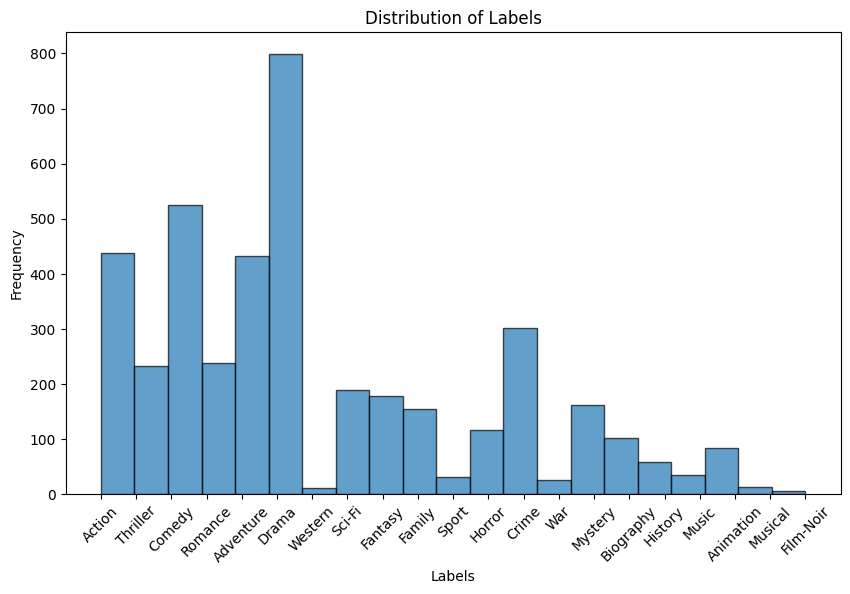

In [ ]:
import matplotlib.pyplot as plt
# Flatten the list of labels for all samples
all_labels = [label for labels in df_details['genre'] for label in labels]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(all_labels, bins=len(set(all_labels)), edgecolor='black', alpha=0.7)
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Function to drop specific labels
def drop_labels(labels, labels_to_drop):
    return [label for label in labels if label not in labels_to_drop]

# Flatten the list of labels for all samples
all_labels = [label for labels in df_details['genre'] for label in labels]

# Get unique labels
unique_labels = list(set(all_labels))
unique_labels


['Horror',
 'Adventure',
 'Biography',
 'Musical',
 'Animation',
 'Sci-Fi',
 'Mystery',
 'Western',
 'Family',
 'History',
 'Crime',
 'Film-Noir',
 'Music',
 'Thriller',
 'Romance',
 'Comedy',
 'War',
 'Action',
 'Drama',
 'Fantasy',
 'Sport']

In [ ]:
# Labels to drop
labels_to_drop = ['Horror',
 'Biography',
 'Musical',
 'Animation',
 'Sci-Fi',
 'Mystery',
 'Western',
 'Family',
 'History',
 'Film-Noir',
 'Music',
 'War',
 'Thriller',
                  'Fantasy',
                  'Romance',
 'Sport' ]

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_details['processed_plot'], df_details['processed_genres'], test_size=0.4, random_state=42)


In [ ]:
# Transform labels into a binary format
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
y_test = mlb.transform(y_test)


In [ ]:
# Build and train the model
model = make_pipeline(TfidfVectorizer(), MultiOutputClassifier(RandomForestClassifier(n_estimators=100)))
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multioutputclassifier',
                 MultiOutputClassifier(estimator=RandomForestClassifier()))])

In [ ]:
# Apply the function to drop labels for each row
df_details['processed_genres'] = df_details['genre'].apply(lambda x: drop_labels(x, labels_to_drop))


In [ ]:
df_details['processed_genres'].shape

(1572,)

In [ ]:
# Make predictions
predictions = model.predict(X_test)


In [ ]:
# Evaluate the model
accuracy_non_normalized = accuracy_score(y_test, predictions, normalize=False)
print(f'Non Normalized Accuracy: {accuracy_non_normalized:.2f}')

Non Normalized Accuracy: 131.00


In [ ]:
print('\nClassification Report:')
print(classification_report(y_test, predictions, target_names=mlb.classes_))


Classification Report:
              precision    recall  f1-score   support

      Action       0.70      0.14      0.23       188
   Adventure       0.81      0.14      0.23       191
      Comedy       0.71      0.20      0.31       199
       Crime       0.81      0.11      0.19       121
       Drama       0.70      0.69      0.69       329

   micro avg       0.71      0.32      0.44      1028
   macro avg       0.75      0.25      0.33      1028
weighted avg       0.74      0.32      0.39      1028
 samples avg       0.46      0.35      0.38      1028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Synopsis predict genre

In [ ]:
# Apply the function to drop labels for each row
df_details['processed_genres'] = df_details['genre'].apply(lambda x: drop_labels(x, labels_to_drop))


In [ ]:
df_details['processed_synopsis'] = df_details['plot_synopsis'].apply(preprocess_text)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_details['processed_synopsis'], df_details['processed_genres'], test_size=0.2, random_state=42)


In [ ]:
# Transform labels into a binary format
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
y_test = mlb.transform(y_test)


In [ ]:
# Build and train the model
model = make_pipeline(TfidfVectorizer(), MultiOutputClassifier(RandomForestClassifier(n_estimators=100)))
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multioutputclassifier',
                 MultiOutputClassifier(estimator=RandomForestClassifier()))])

In [ ]:
# Make predictions
predictions = model.predict(X_test)


In [ ]:
# Evaluate the model
accuracy_non_normalized = accuracy_score(y_test, predictions, normalize=False)
print(f'Non Normalized Accuracy: {accuracy_non_normalized:.2f}')

Non Normalized Accuracy: 78.00


In [ ]:
print('\nClassification Report:')
print(classification_report(y_test, predictions, target_names=mlb.classes_))


Classification Report:
              precision    recall  f1-score   support

      Action       0.93      0.27      0.41        98
   Adventure       0.78      0.20      0.32        89
      Comedy       0.56      0.30      0.39       102
       Crime       0.83      0.07      0.13        69
       Drama       0.69      0.81      0.75       167

   micro avg       0.70      0.41      0.52       525
   macro avg       0.76      0.33      0.40       525
weighted avg       0.75      0.41      0.46       525
 samples avg       0.54      0.44      0.46       525



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Predicting genre from review rating then